![](itd.png)

    
# Análisis de Datos Masivos
## Análisis de correlación en Python

## Nombree del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

### Parte 1: El conjunto de datos


**Paso 1: Carga del conjunto de datos desde un archivo**

Antes de utilizar el conjunto de datos, debe cargarlo en la memoria.

En el siguiente código, la primera línea importa los módulos pandas y define pd como un descriptor que se refiere al módulo.

La segunda línea carga el archivo CSV del conjunto de datos en una variable llamada brainFile.

La tercera línea utiliza read_csv(), un método pandas para convertir el conjunto de datos CSV guardado en brainFile en una estructura de datos. La estructura de datos se almacena luego en la variable brainFrame.

In [4]:
import pandas as pd
brainFile = 'brainsize.txt'
brainFrame = pd.read_csv(brainFile)

**Paso 2: Verificación de la estructura de datos**

Para asegurarse de que la estructura de datos se haya cargado y creado, utilice el método head(). Otros métodos Pandas, head(), muestra las primeras cinco entradas de una estructura de datos.


In [5]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


### Parte 2: Gráficos de dispersión y variables correlacionables

**Paso 1: El método Pandas describe().**

El módulo de Pandas incluye el método describe() que realiza los mismos cálculos comunes sobre un conjunto de datos determinado. Además de proporcionar resultados comunes, incluidos el conteo, el promedio, la desviación estándar, el mínimo y el máximo, describe() también es una excelente manera de probar rápidamente la validez de los valores de la estructura de datos.


In [6]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


**Paso 2: Gráficos de dispersión**

Los gráficos de dispersión son importantes al trabajar con correlaciones, ya que permiten una verificación visual rápida de la naturaleza de la relación entre las variables. Esta práctica de laboratorio utiliza el coeficiente de correlación de Pearson, que es sensible sólo a una relación lineal entre dos variables. Existen oros métodos de correlación más robustos, pero exceden el alcance de esta práctica de laboratorio.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Esto se realiza para que los datos no se sesguen
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

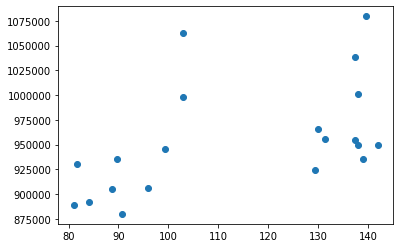

In [9]:
%matplotlib inline
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()

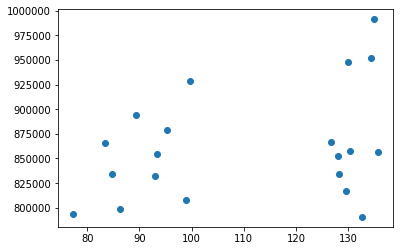

In [10]:
%matplotlib inline
#Gráfica que muestra solamente a las mujeres
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()

### Parte 3: Calcular la correlación con Python
**Paso 1: Cálculo de la correlación según brainFrame**

El método pandas corr()) ofrece una manera fácil de calcular la correlación según una estructura de datos. Simplemente empleando el método según una estructura de datos, uno puede obtener la correlación entre todas las variables al mismo tiempo.



In [11]:
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


**Observe la diagonal de izquierda a derecha en la tabla de correlación generada arriba. ¿Por qué la diagonal está plagada de 1? ¿Se trata de una coincidencia? Explique.**

**Respuesta**: Es por que hay coincidencia entre la fila y la columna, ya que en si estaría haciendo la correlación al mismo valor, por lo que cuando se encuentran estos en coincidencia, siempre dará el valor de 1. Por ejemplo se topa FSIQ-FSIQ, VIQ-VIQ, PIQ-PIQ, etc. Pero cuando se topa por ejemplo FSIQ-VIQ, ahí ya no entraría en coincidencia por lo que estaría dando otro valor como resultado.


**Si continuamos observando la tabla de correlación que figura arriba, notaremos que los valores se duplican; los valores debajo de la diagonal 1 tienen valores homólogos duplicados sobre la diagonal 1. ¿Se trata de una coincidencia? Explique.**

**Respuesta**: Es similar a la pregunta anterior, solamente que aquí entra en juego el match de columas con filas. Se puede observar que en el DataFrame se encuentran los nombres FSIQ, VIQ, QIQ, Weight, Height, MRI_Count tanto en las filas como en las columnas, por lo que habra en un momento en donde esos dados hagan doble match y se repitan los datos.


In [12]:
##Correlación para mujeres
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [13]:
##Correlación para hombres
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


### Parte 4: Visualización


**Paso 1: Instalar Seaborn en dado caso de que no este instalado**
El módulo de Python denominado seaborn facilita el trazado de los gráficos de los mapas de calor.

**Paso 2: Preparar la estructura de datos para Seaborn**

In [14]:
import seaborn as sns

womenNoGenderDf = womenDf.drop('Gender', axis=1)
menNoGenderDf = menDf.drop('Gender', axis=1)

womenNoGenderDf = womenNoGenderDf[womenNoGenderDf.columns].astype(float)
menNoGenderDf = menNoGenderDf[menNoGenderDf.columns].astype(float)

**Paso 3: Trazado del mapa de calor de correlación**

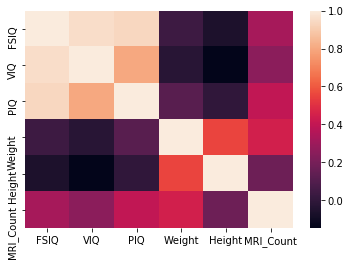

In [15]:
wcorr = womenNoGenderDf.corr()
sns.heatmap(wcorr)
plt.savefig('attribute_correlations.png', tight_layout=True)

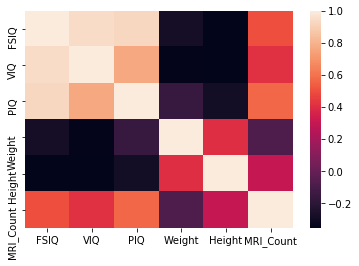

In [18]:
mcorr = menNoGenderDf.corr()
sns.heatmap(mcorr)
plt.savefig('attribute_correlations.png', tight_layout=True)

**Muchos pares de variables presentan una correlación cercana a cero. ¿Qué significa?**

**Respuesta**: Significa que esos valores tienen una baja o una correlación entre si.


**¿Por qué se separan los géneros?**

**Respuesta**: Para poder tener los datos de una manera más precisa y poder realizar un análisis de manera separada pero ya previamente agrupada por géneros.Además de que ayuda a comparar un género con el otro.


**¿Qué variables tienen una correlación más estrecha con el tamaño del cerebro (MRI_Count)? ¿Es eso lo que se espera? Explique.**

**Respuesta**: PIQ y en su continuación seria FSIQ. Se esperaba que hubiera otros valores que tuvieran una correlación mas cercana, pues luego de FSIQ baja bastante la correlación con otras variables (En los hombres, en las mujeres hay una correlación más baja). 